In [1]:
import sys

import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as ex

sys.path.insert(0, '..')
from scripts import exploratory_analysis
from scripts import dist
from matplotlib import pyplot as plt
from scipy import stats as ss

In [2]:
beneficiary_data = pd.read_pickle('../../data/cleaned/train_beneficiary.pkl')
inpatient_data = pd.read_pickle('../../data/cleaned/train_inpatient.pkl')
outpatient_data = pd.read_pickle('../../data/cleaned/train_outpatient.pkl')

In [3]:
beneficiary_data.head()

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,neither,1,1,0.8587,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,neither,2,1,0.8587,39,280,12,12,...,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,neither,1,1,0.8587,52,590,12,12,...,2,2,1,2,2,2,0,0,90,40
3,BENE11004,1922-07-01,neither,1,1,0.8587,39,270,12,12,...,2,1,1,1,1,2,0,0,1810,760
4,BENE11005,1935-09-01,neither,1,1,0.8587,24,680,12,12,...,2,1,2,2,2,2,0,0,1790,1200


In [4]:
inpatient_data.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,0.620991,0.411227,0.884123,2009-04-12,...,0.019840,0.185230,0.007684,0.902975,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,0.620991,0.411128,0.884123,2009-08-31,...,0.179325,0.245639,0.333473,0.902975,7092.0,999999.0,999999.0,999999.0,999999.0,999999.0
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,0.620991,0.411227,0.109058,2009-09-17,...,0.179325,0.245639,0.333473,0.902975,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,0.620991,0.411128,0.109058,2009-02-14,...,0.188047,0.007783,0.023842,0.902975,331.0,999999.0,999999.0,999999.0,999999.0,999999.0
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,0.620991,0.411128,0.884123,2009-08-13,...,0.003385,0.000618,0.171073,0.902975,3893.0,999999.0,999999.0,999999.0,999999.0,999999.0


In [5]:
outpatient_data.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,0.855262,0.824975,0.623272,0.523217,...,0.971341,0.997908,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,0,0.098305
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,0.855262,0.824975,0.623272,0.523217,...,0.971341,0.997908,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,0,0.000686
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,0.855262,0.824975,0.623272,0.005785,...,0.971341,0.997908,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,0,0.796373
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,0.855262,0.824975,0.623272,0.523217,...,0.971341,0.997908,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,0,0.796373
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,0.855262,0.824975,0.623272,0.523217,...,0.971341,0.997908,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,0,0.098305


In [6]:
common_columns = set(inpatient_data.columns).intersection(set(outpatient_data.columns))
unique_to_inpatient = [col for col in inpatient_data.columns if col not in common_columns]
unique_to_outpatient = [col for col in outpatient_data.columns if col not in common_columns]

unique_to_inpatient, unique_to_outpatient

(['AdmissionDt', 'DischargeDt', 'DiagnosisGroupCode'], [])

****Beneficiary Data****

In [7]:
beneficiary_data.dtypes

BeneID                              object
DOB                                 object
DOD                                 object
Gender                               int64
Race                                 int64
RenalDiseaseIndicator              float64
State                                int64
County                               int64
NoOfMonths_PartACov                  int64
NoOfMonths_PartBCov                  int64
ChronicCond_Alzheimer                int64
ChronicCond_Heartfailure             int64
ChronicCond_KidneyDisease            int64
ChronicCond_Cancer                   int64
ChronicCond_ObstrPulmonary           int64
ChronicCond_Depression               int64
ChronicCond_Diabetes                 int64
ChronicCond_IschemicHeart            int64
ChronicCond_Osteoporasis             int64
ChronicCond_rheumatoidarthritis      int64
ChronicCond_stroke                   int64
IPAnnualReimbursementAmt             int64
IPAnnualDeductibleAmt                int64
OPAnnualRei

In [8]:
unique_values = {col: beneficiary_data[col].nunique() for col in beneficiary_data.columns}
unique_values

{'BeneID': 138556,
 'DOB': 900,
 'DOD': 12,
 'Gender': 2,
 'Race': 4,
 'RenalDiseaseIndicator': 2,
 'State': 52,
 'County': 314,
 'NoOfMonths_PartACov': 13,
 'NoOfMonths_PartBCov': 13,
 'ChronicCond_Alzheimer': 2,
 'ChronicCond_Heartfailure': 2,
 'ChronicCond_KidneyDisease': 2,
 'ChronicCond_Cancer': 2,
 'ChronicCond_ObstrPulmonary': 2,
 'ChronicCond_Depression': 2,
 'ChronicCond_Diabetes': 2,
 'ChronicCond_IschemicHeart': 2,
 'ChronicCond_Osteoporasis': 2,
 'ChronicCond_rheumatoidarthritis': 2,
 'ChronicCond_stroke': 2,
 'IPAnnualReimbursementAmt': 3004,
 'IPAnnualDeductibleAmt': 147,
 'OPAnnualReimbursementAmt': 2078,
 'OPAnnualDeductibleAmt': 789}

In [9]:
ben_sample = beneficiary_data.sample(frac=0.1, random_state=1)
ben_sample.shape

(13856, 25)

****Inpatient Data****

In [10]:
inpatient_data.dtypes

BeneID                     object
ClaimID                    object
ClaimStartDt               object
ClaimEndDt                 object
Provider                   object
InscClaimAmtReimbursed      int64
AttendingPhysician        float64
OperatingPhysician        float64
OtherPhysician            float64
AdmissionDt                object
ClmAdmitDiagnosisCode     float64
DeductibleAmtPaid         float64
DischargeDt                object
DiagnosisGroupCode        float64
ClmDiagnosisCode_1        float64
ClmDiagnosisCode_2        float64
ClmDiagnosisCode_3        float64
ClmDiagnosisCode_4        float64
ClmDiagnosisCode_5        float64
ClmDiagnosisCode_6        float64
ClmDiagnosisCode_7        float64
ClmDiagnosisCode_8        float64
ClmDiagnosisCode_9        float64
ClmDiagnosisCode_10       float64
ClmProcedureCode_1        float64
ClmProcedureCode_2        float64
ClmProcedureCode_3        float64
ClmProcedureCode_4        float64
ClmProcedureCode_5        float64
ClmProcedureCo

In [11]:
in_unique_values = {col: inpatient_data[col].nunique() for col in inpatient_data.columns}
in_unique_values

{'BeneID': 31289,
 'ClaimID': 40474,
 'ClaimStartDt': 398,
 'ClaimEndDt': 365,
 'Provider': 2092,
 'InscClaimAmtReimbursed': 146,
 'AttendingPhysician': 89,
 'OperatingPhysician': 63,
 'OtherPhysician': 9,
 'AdmissionDt': 398,
 'ClmAdmitDiagnosisCode': 118,
 'DeductibleAmtPaid': 1,
 'DischargeDt': 365,
 'DiagnosisGroupCode': 134,
 'ClmDiagnosisCode_1': 130,
 'ClmDiagnosisCode_2': 127,
 'ClmDiagnosisCode_3': 129,
 'ClmDiagnosisCode_4': 127,
 'ClmDiagnosisCode_5': 129,
 'ClmDiagnosisCode_6': 126,
 'ClmDiagnosisCode_7': 119,
 'ClmDiagnosisCode_8': 117,
 'ClmDiagnosisCode_9': 108,
 'ClmDiagnosisCode_10': 26,
 'ClmProcedureCode_1': 1118,
 'ClmProcedureCode_2': 298,
 'ClmProcedureCode_3': 155,
 'ClmProcedureCode_4': 49,
 'ClmProcedureCode_5': 7,
 'ClmProcedureCode_6': 1}

In [12]:
inpatient_sample = inpatient_data.sample(frac=0.2, random_state=1)
inpatient_sample.shape

(8095, 30)

****Outpatient Data****

In [13]:
outpatient_data.dtypes

BeneID                     object
ClaimID                    object
ClaimStartDt               object
ClaimEndDt                 object
Provider                   object
InscClaimAmtReimbursed      int64
AttendingPhysician        float64
OperatingPhysician        float64
OtherPhysician            float64
ClmDiagnosisCode_1        float64
ClmDiagnosisCode_2        float64
ClmDiagnosisCode_3        float64
ClmDiagnosisCode_4        float64
ClmDiagnosisCode_5        float64
ClmDiagnosisCode_6        float64
ClmDiagnosisCode_7        float64
ClmDiagnosisCode_8        float64
ClmDiagnosisCode_9        float64
ClmDiagnosisCode_10       float64
ClmProcedureCode_1        float64
ClmProcedureCode_2        float64
ClmProcedureCode_3        float64
ClmProcedureCode_4        float64
ClmProcedureCode_5        float64
ClmProcedureCode_6        float64
DeductibleAmtPaid           int64
ClmAdmitDiagnosisCode     float64
dtype: object

In [14]:
out_unique_values = {col: outpatient_data[col].nunique() for col in outpatient_data.columns}
out_unique_values

{'BeneID': 133980,
 'ClaimID': 517737,
 'ClaimStartDt': 385,
 'ClaimEndDt': 366,
 'Provider': 5012,
 'InscClaimAmtReimbursed': 342,
 'AttendingPhysician': 123,
 'OperatingPhysician': 4,
 'OtherPhysician': 39,
 'ClmDiagnosisCode_1': 245,
 'ClmDiagnosisCode_2': 189,
 'ClmDiagnosisCode_3': 119,
 'ClmDiagnosisCode_4': 83,
 'ClmDiagnosisCode_5': 45,
 'ClmDiagnosisCode_6': 23,
 'ClmDiagnosisCode_7': 19,
 'ClmDiagnosisCode_8': 12,
 'ClmDiagnosisCode_9': 6,
 'ClmDiagnosisCode_10': 2,
 'ClmProcedureCode_1': 81,
 'ClmProcedureCode_2': 23,
 'ClmProcedureCode_3': 5,
 'ClmProcedureCode_4': 3,
 'ClmProcedureCode_5': 1,
 'ClmProcedureCode_6': 1,
 'DeductibleAmtPaid': 16,
 'ClmAdmitDiagnosisCode': 70}

In [15]:
outpatient_sample = outpatient_data.sample(frac=0.03, random_state=1)
outpatient_sample.shape

(15532, 27)

***Test the underlying assumptions:***

fixed location and random draw assumptions are fulfilled. normality nearly hold in ***OPAnnualReimbursementAmt***
feature.

In [16]:
ben_EDA = exploratory_analysis.Factory(ben_sample)
ben_assumption_test = exploratory_analysis.FourPlots(ben_EDA)
ben_assumption_test

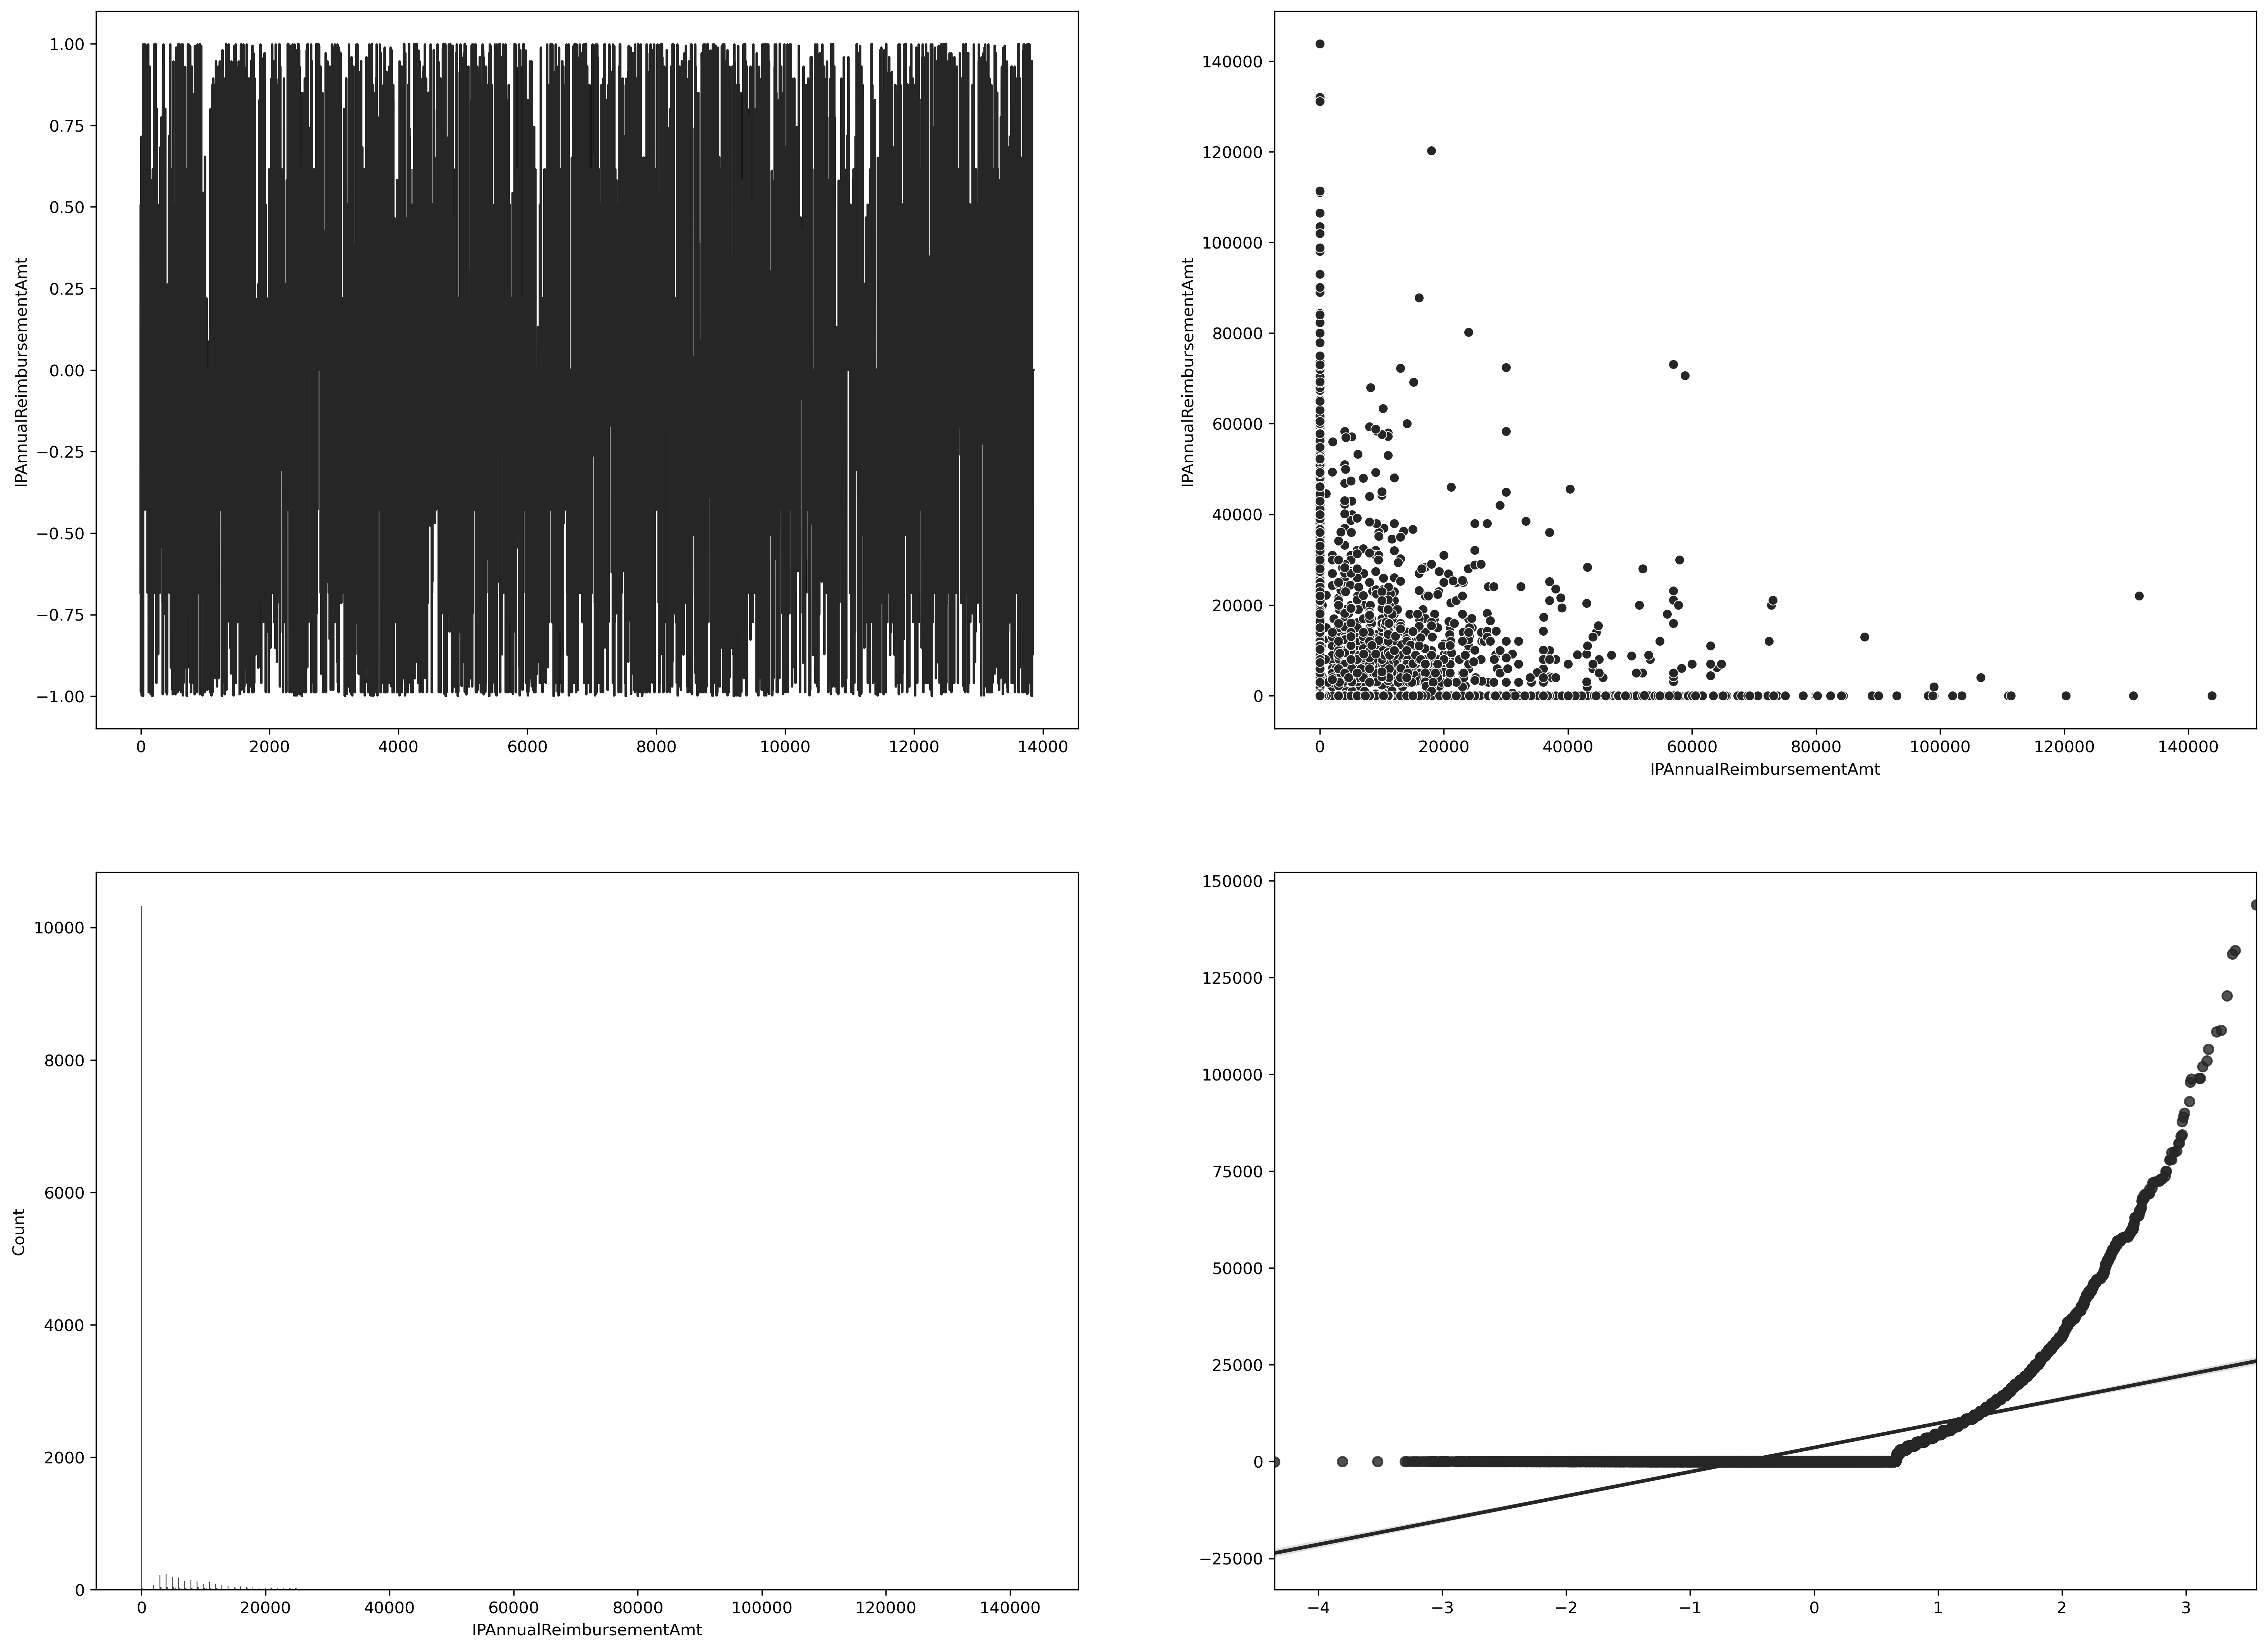

In [17]:
ben_assumption_test.four_plot(feature='IPAnnualReimbursementAmt',
                              color='#262626',
                              save=True, path='../../demo/Fraud Detection/IPAnnualReimbursementAmt_4plot.png')

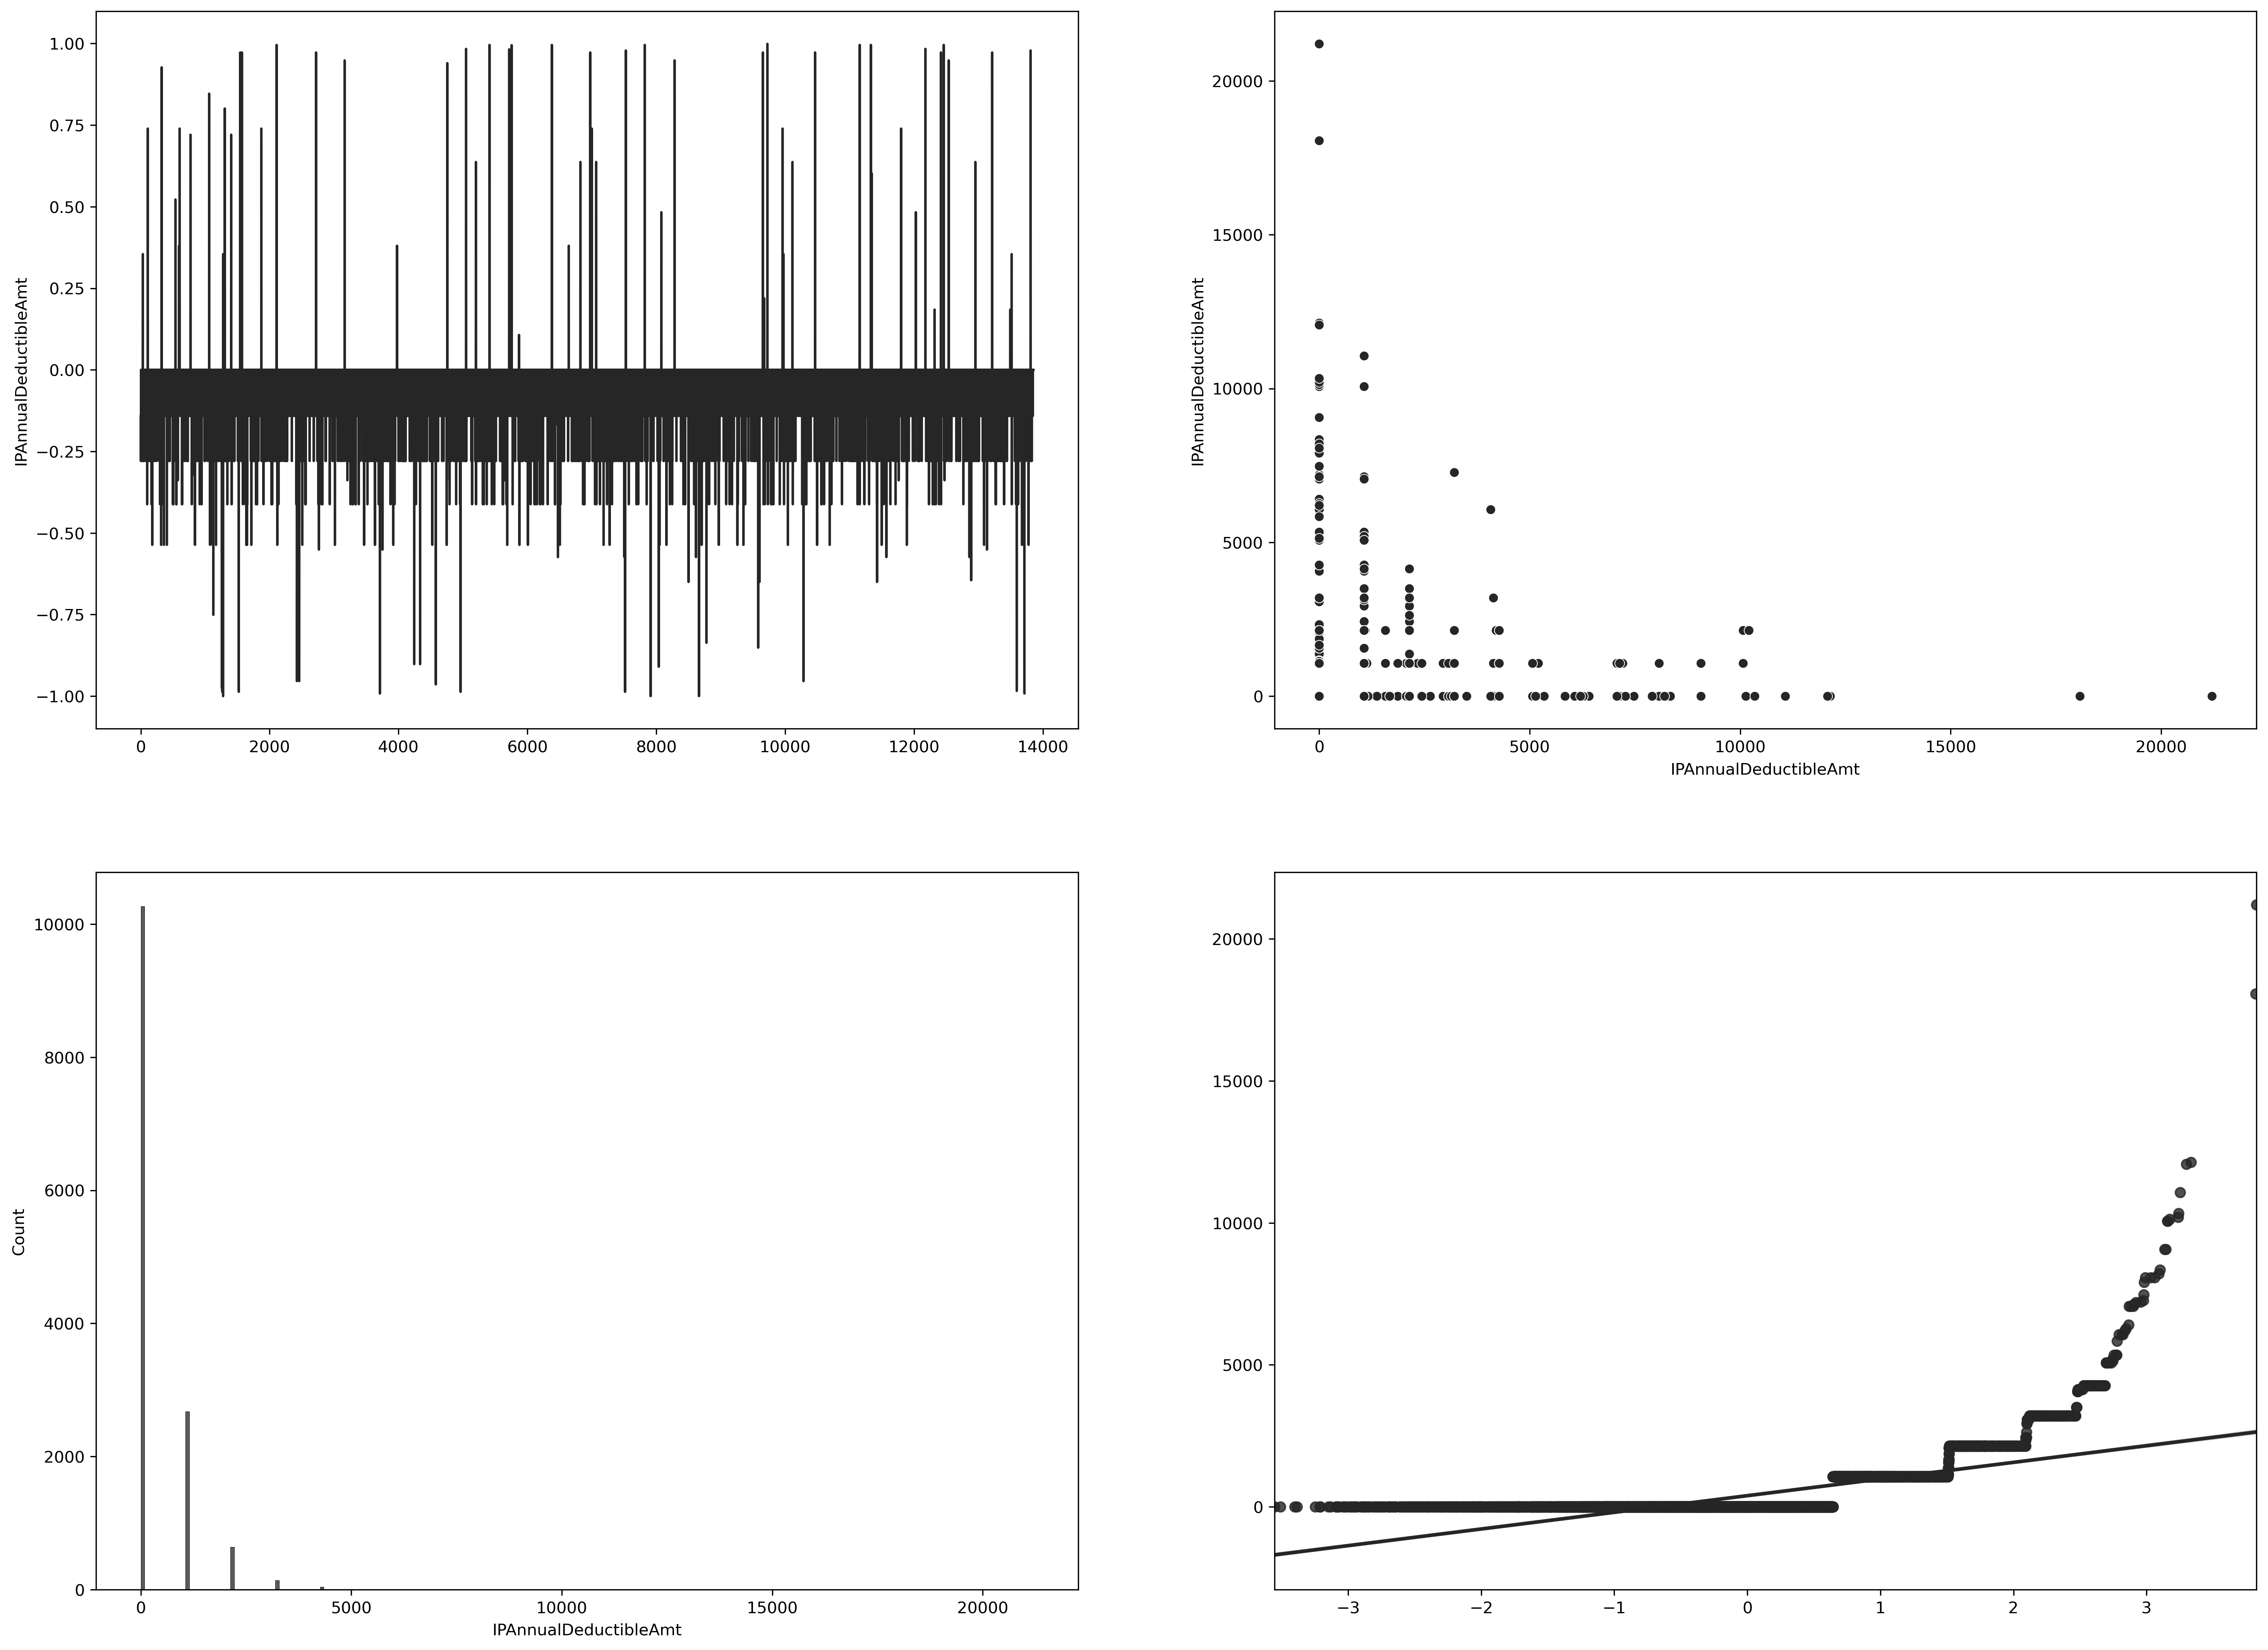

In [18]:
ben_assumption_test.four_plot(feature='IPAnnualDeductibleAmt',
                              color='#262626',
                              save=True, path='../../demo/Fraud Detection/IPAnnualDeductibleAmt_4plot.png')

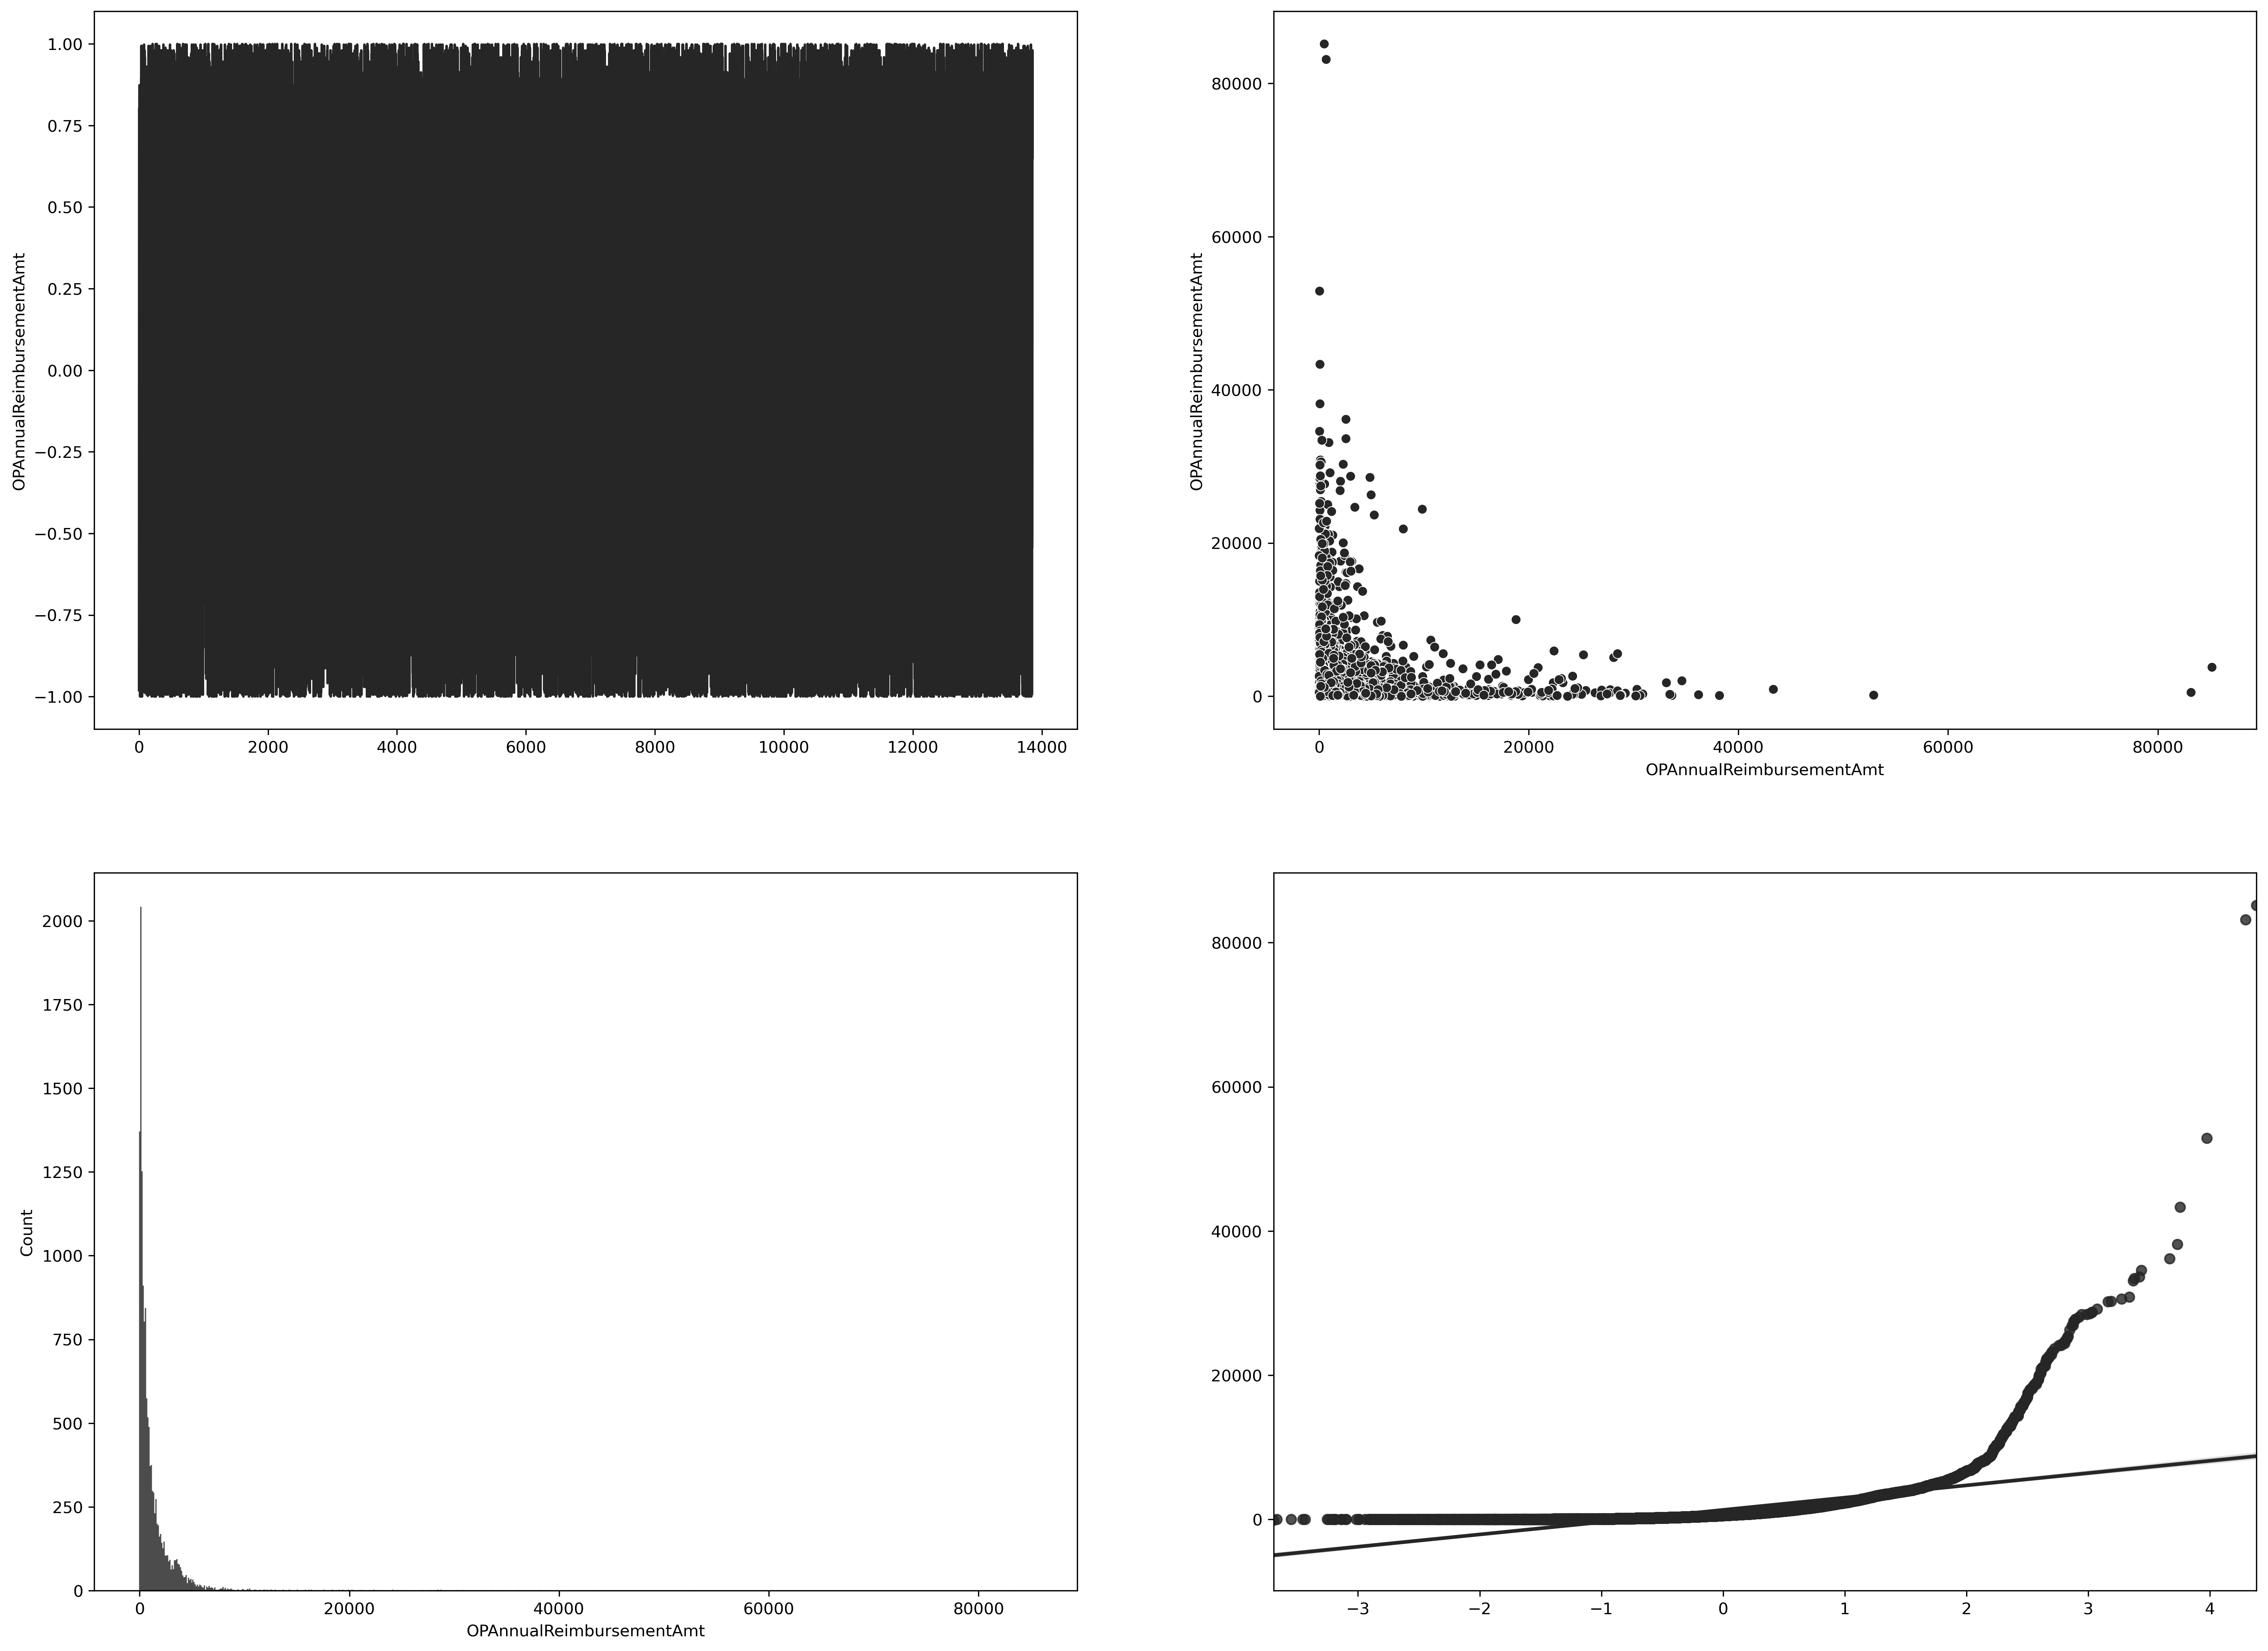

In [19]:
ben_assumption_test.four_plot(feature='OPAnnualReimbursementAmt',
                              color='#262626',
                              save=True, path='../../demo/Fraud Detection/OPAnnualReimbursementAmt_4plot.png')

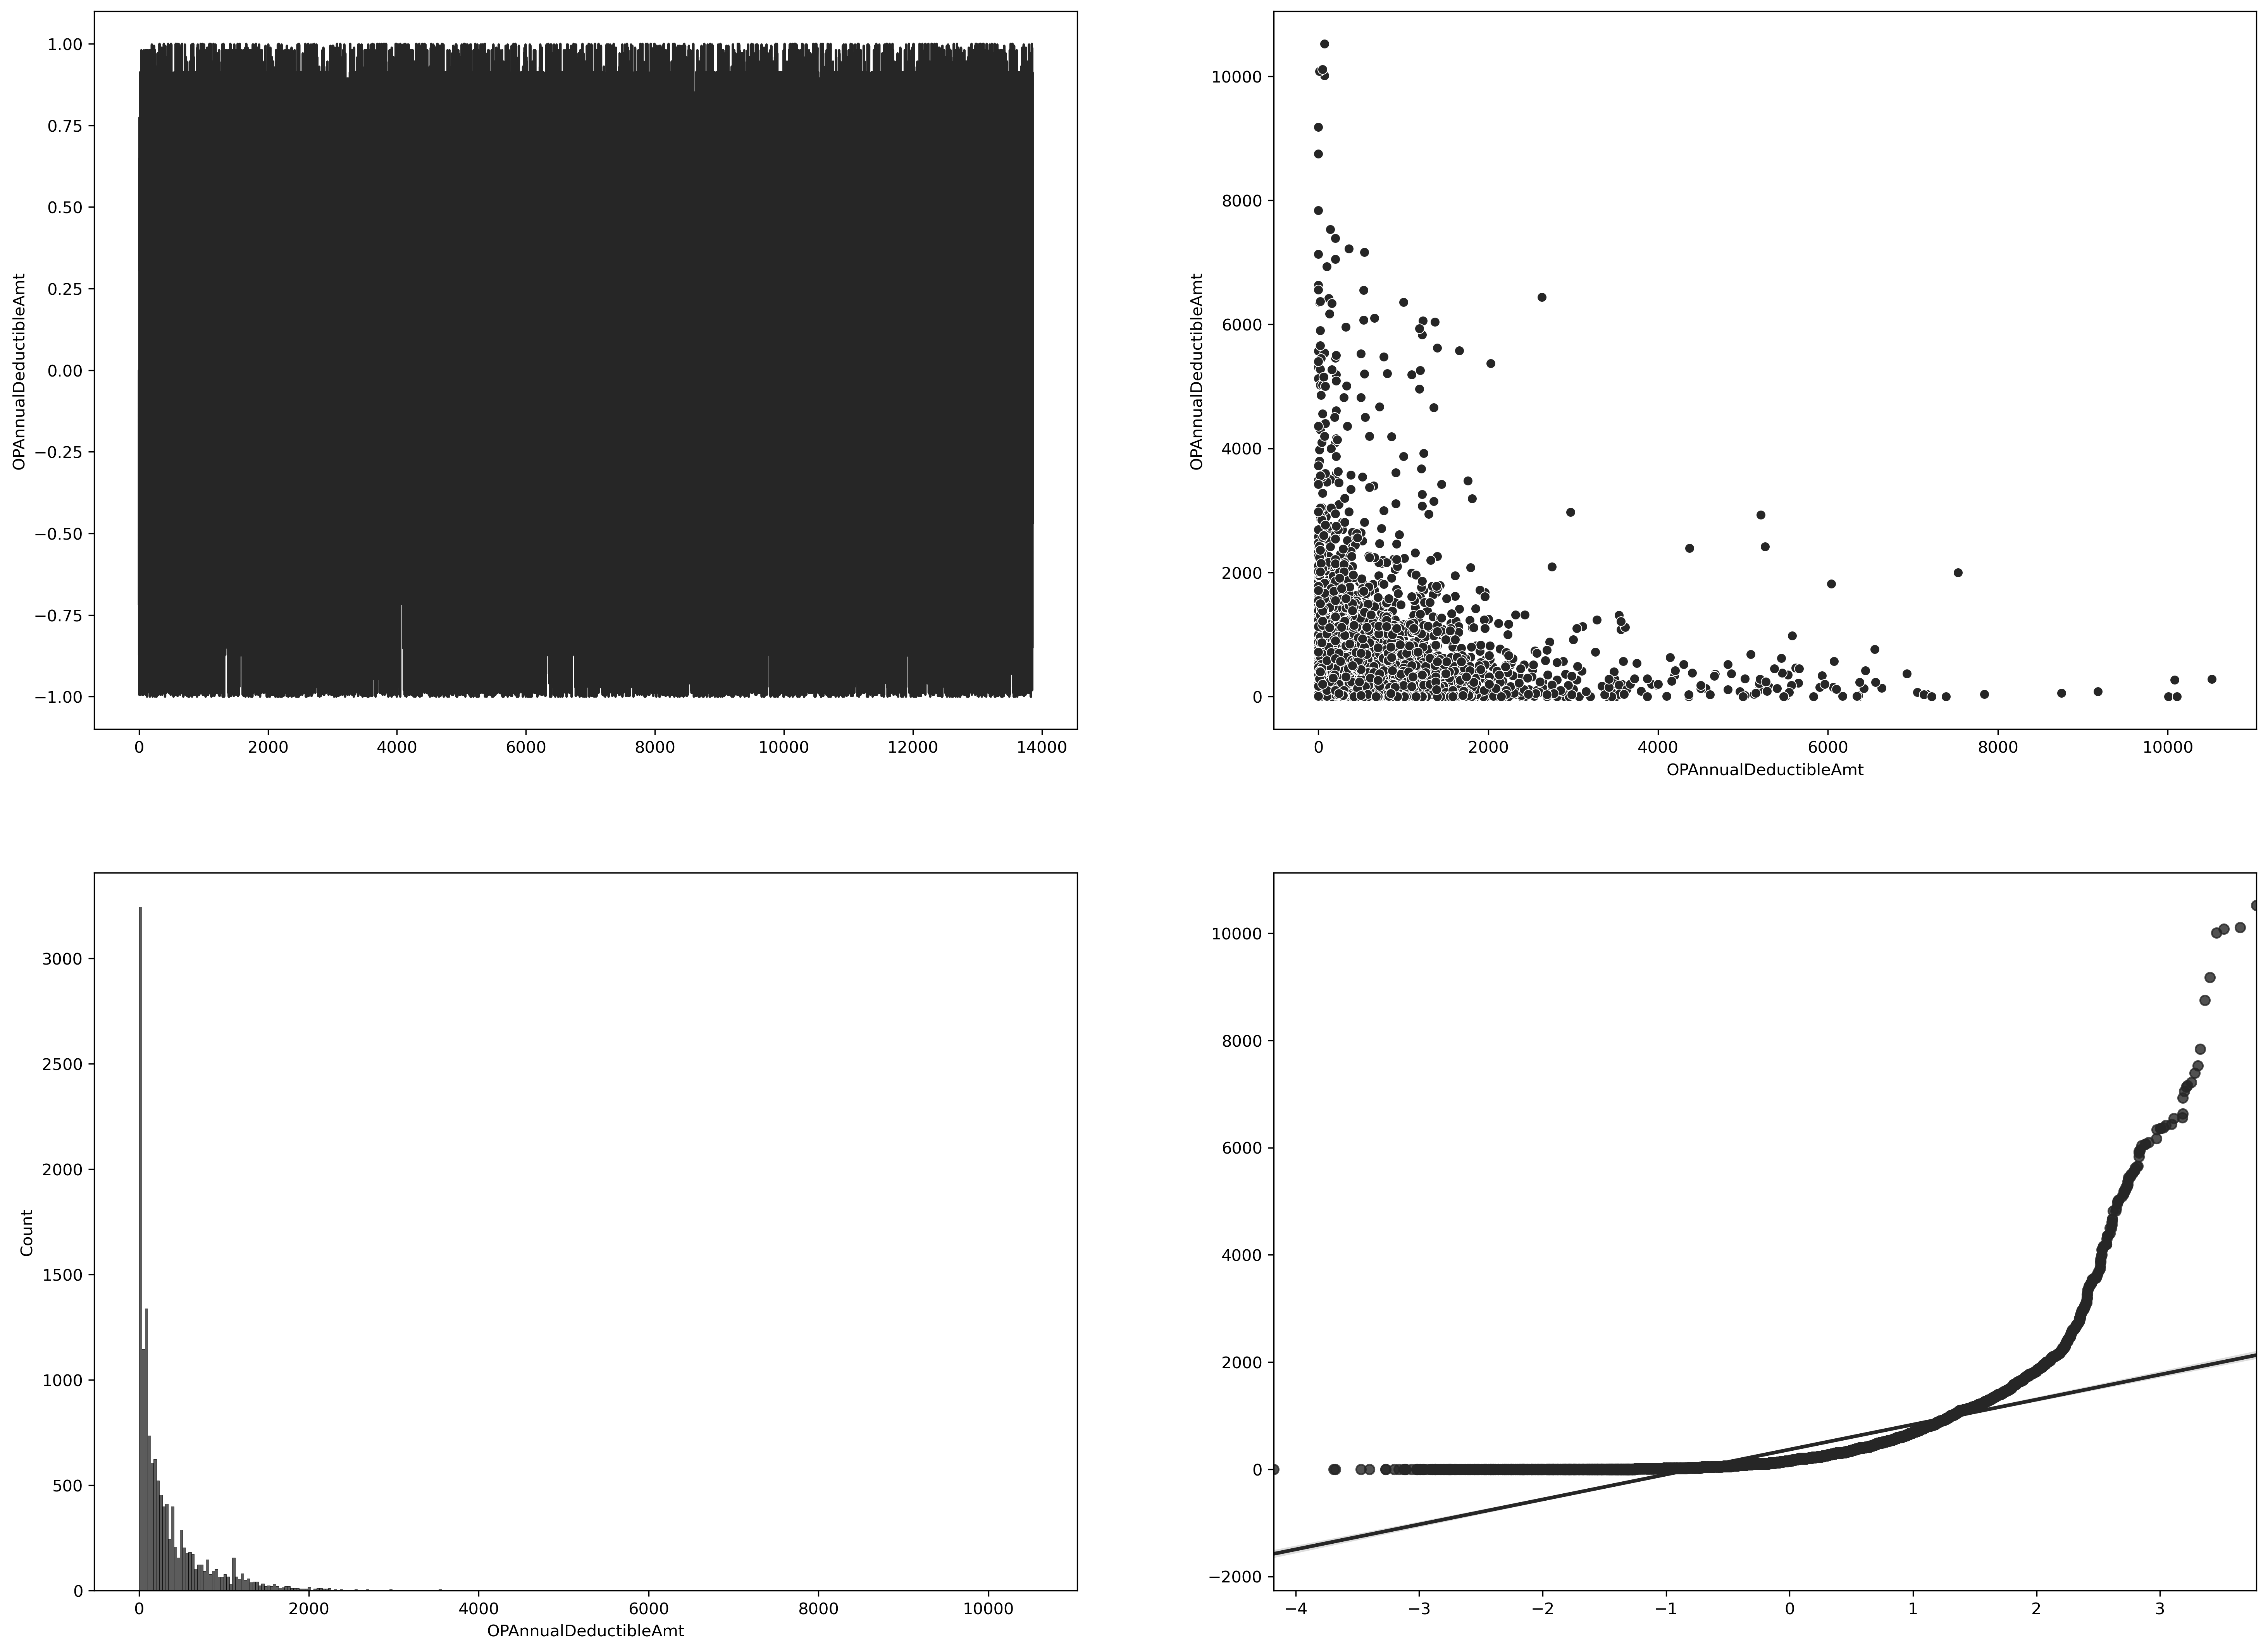

In [20]:
ben_assumption_test.four_plot(feature='OPAnnualDeductibleAmt',
                              color='#262626',
                              save=True, path='../../demo/Fraud Detection/OPAnnualDeductibleAmt_4plot.png')

***Histogram***

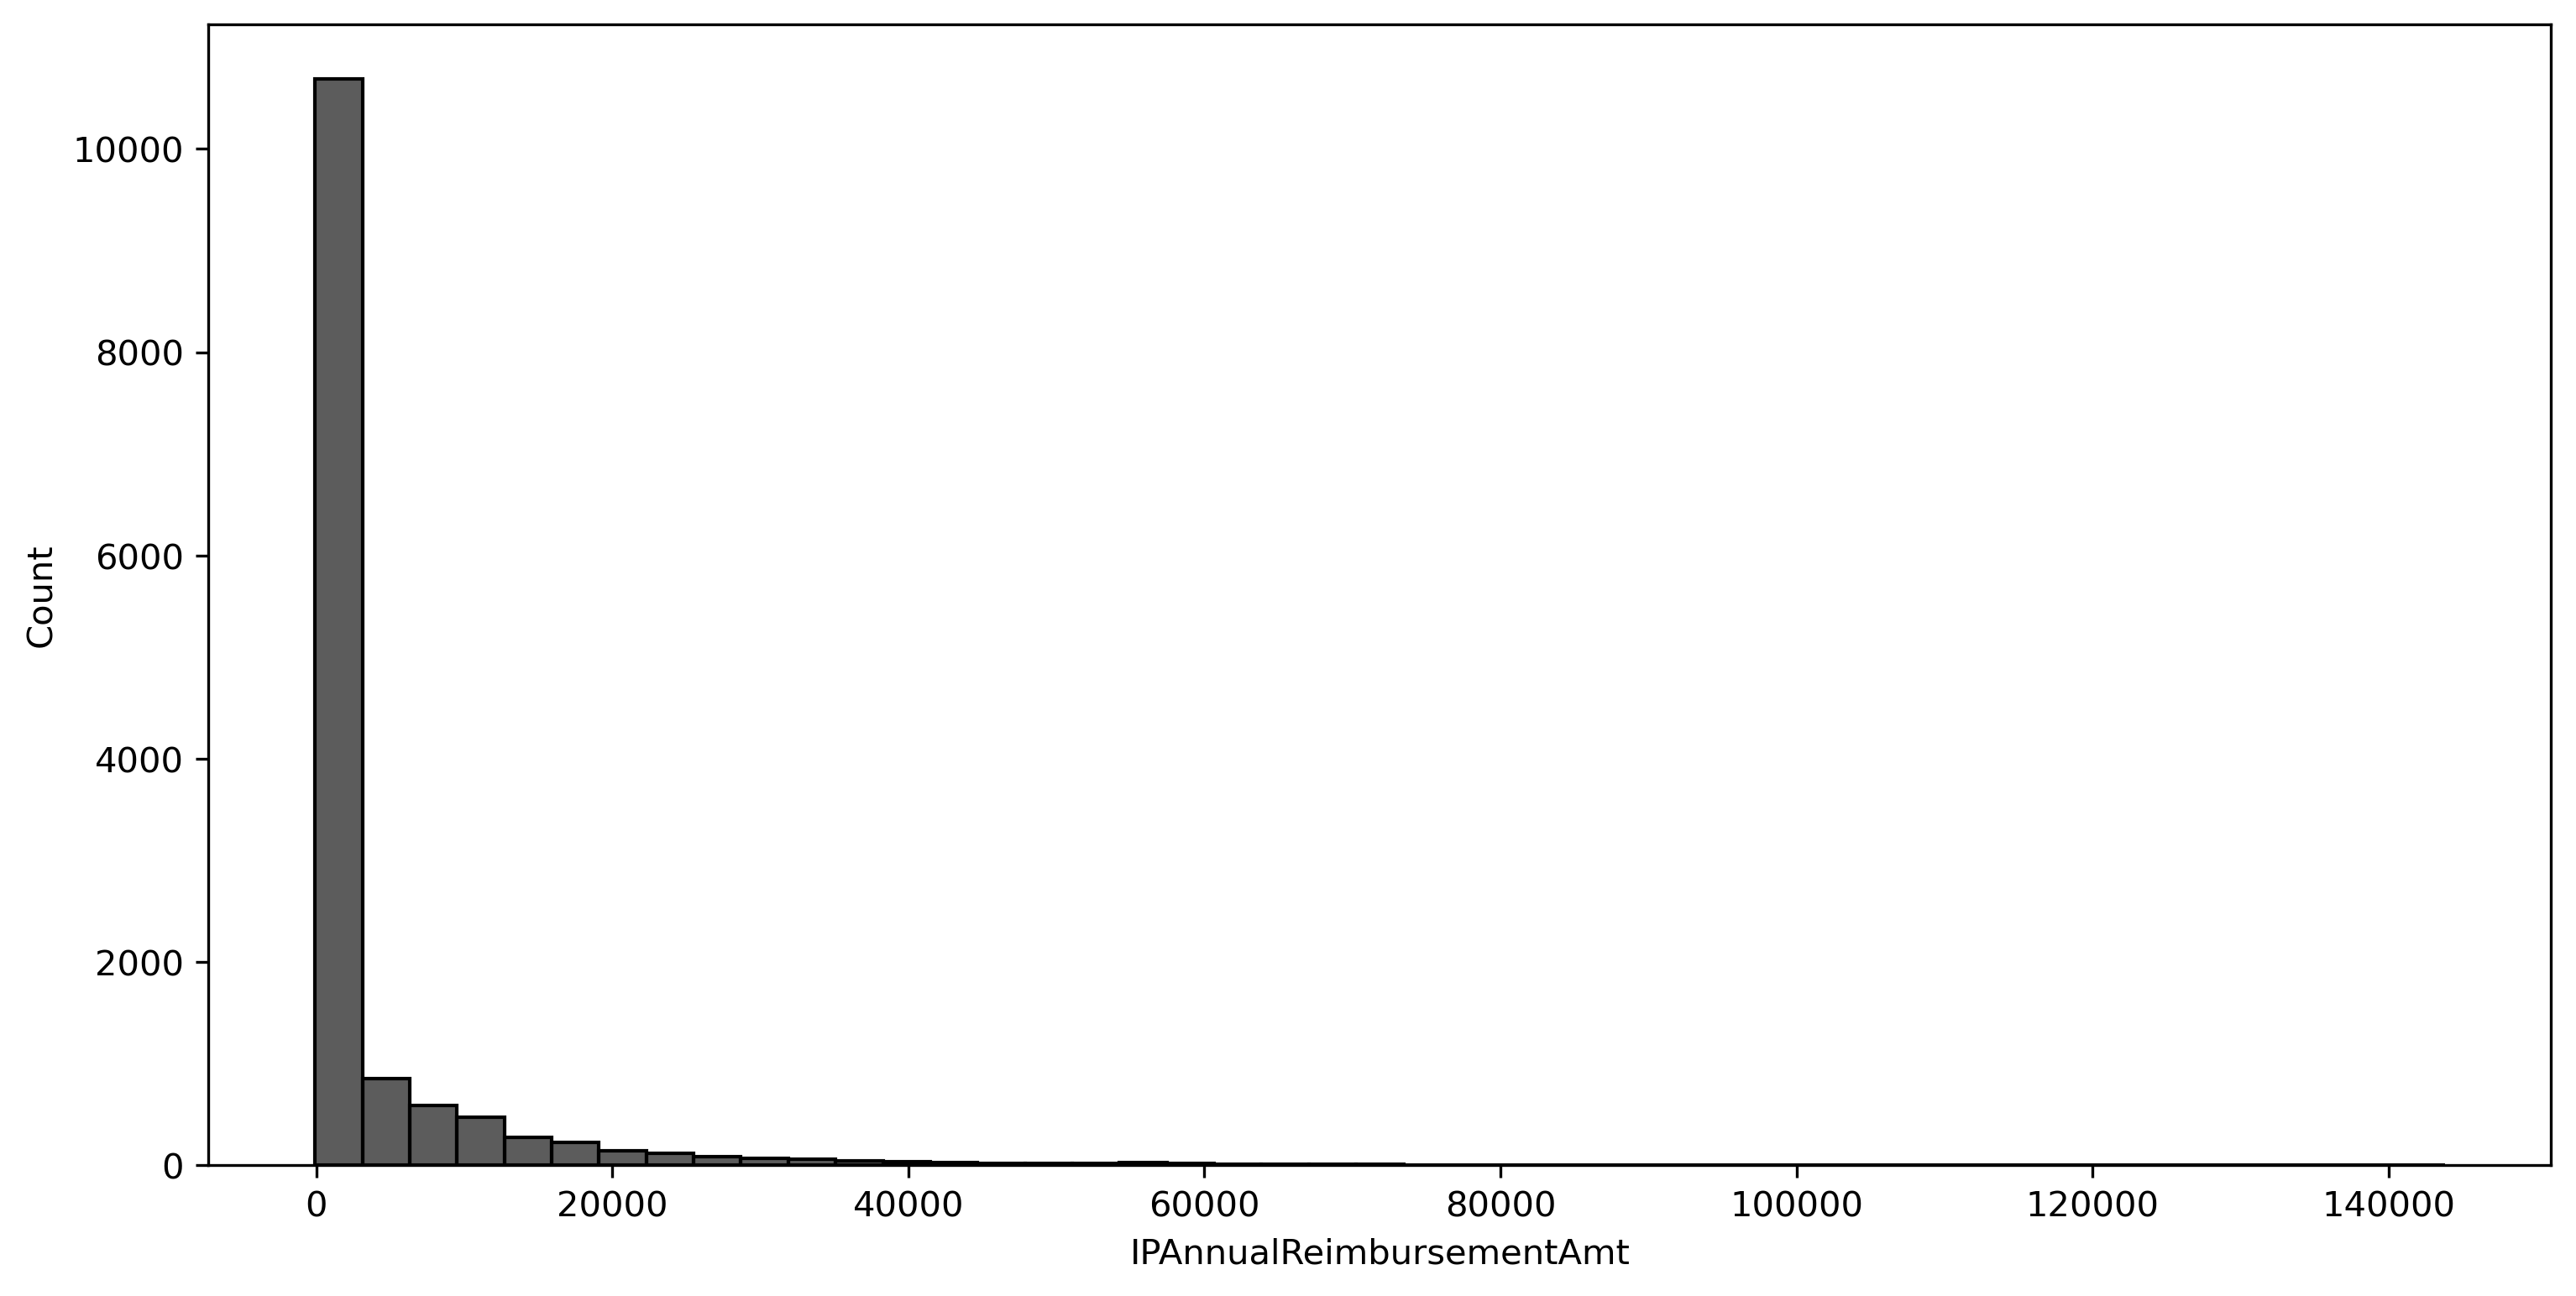

In [25]:
ben_assumption_test.hist_plot(feature='IPAnnualReimbursementAmt',
                              color='#262626',
                              fig_size=[12, 6],
                              save=True,
                              bins=45,
                              path='../../demo/Fraud Detection/IPAnnualReimbursementAmt_histogram.png')

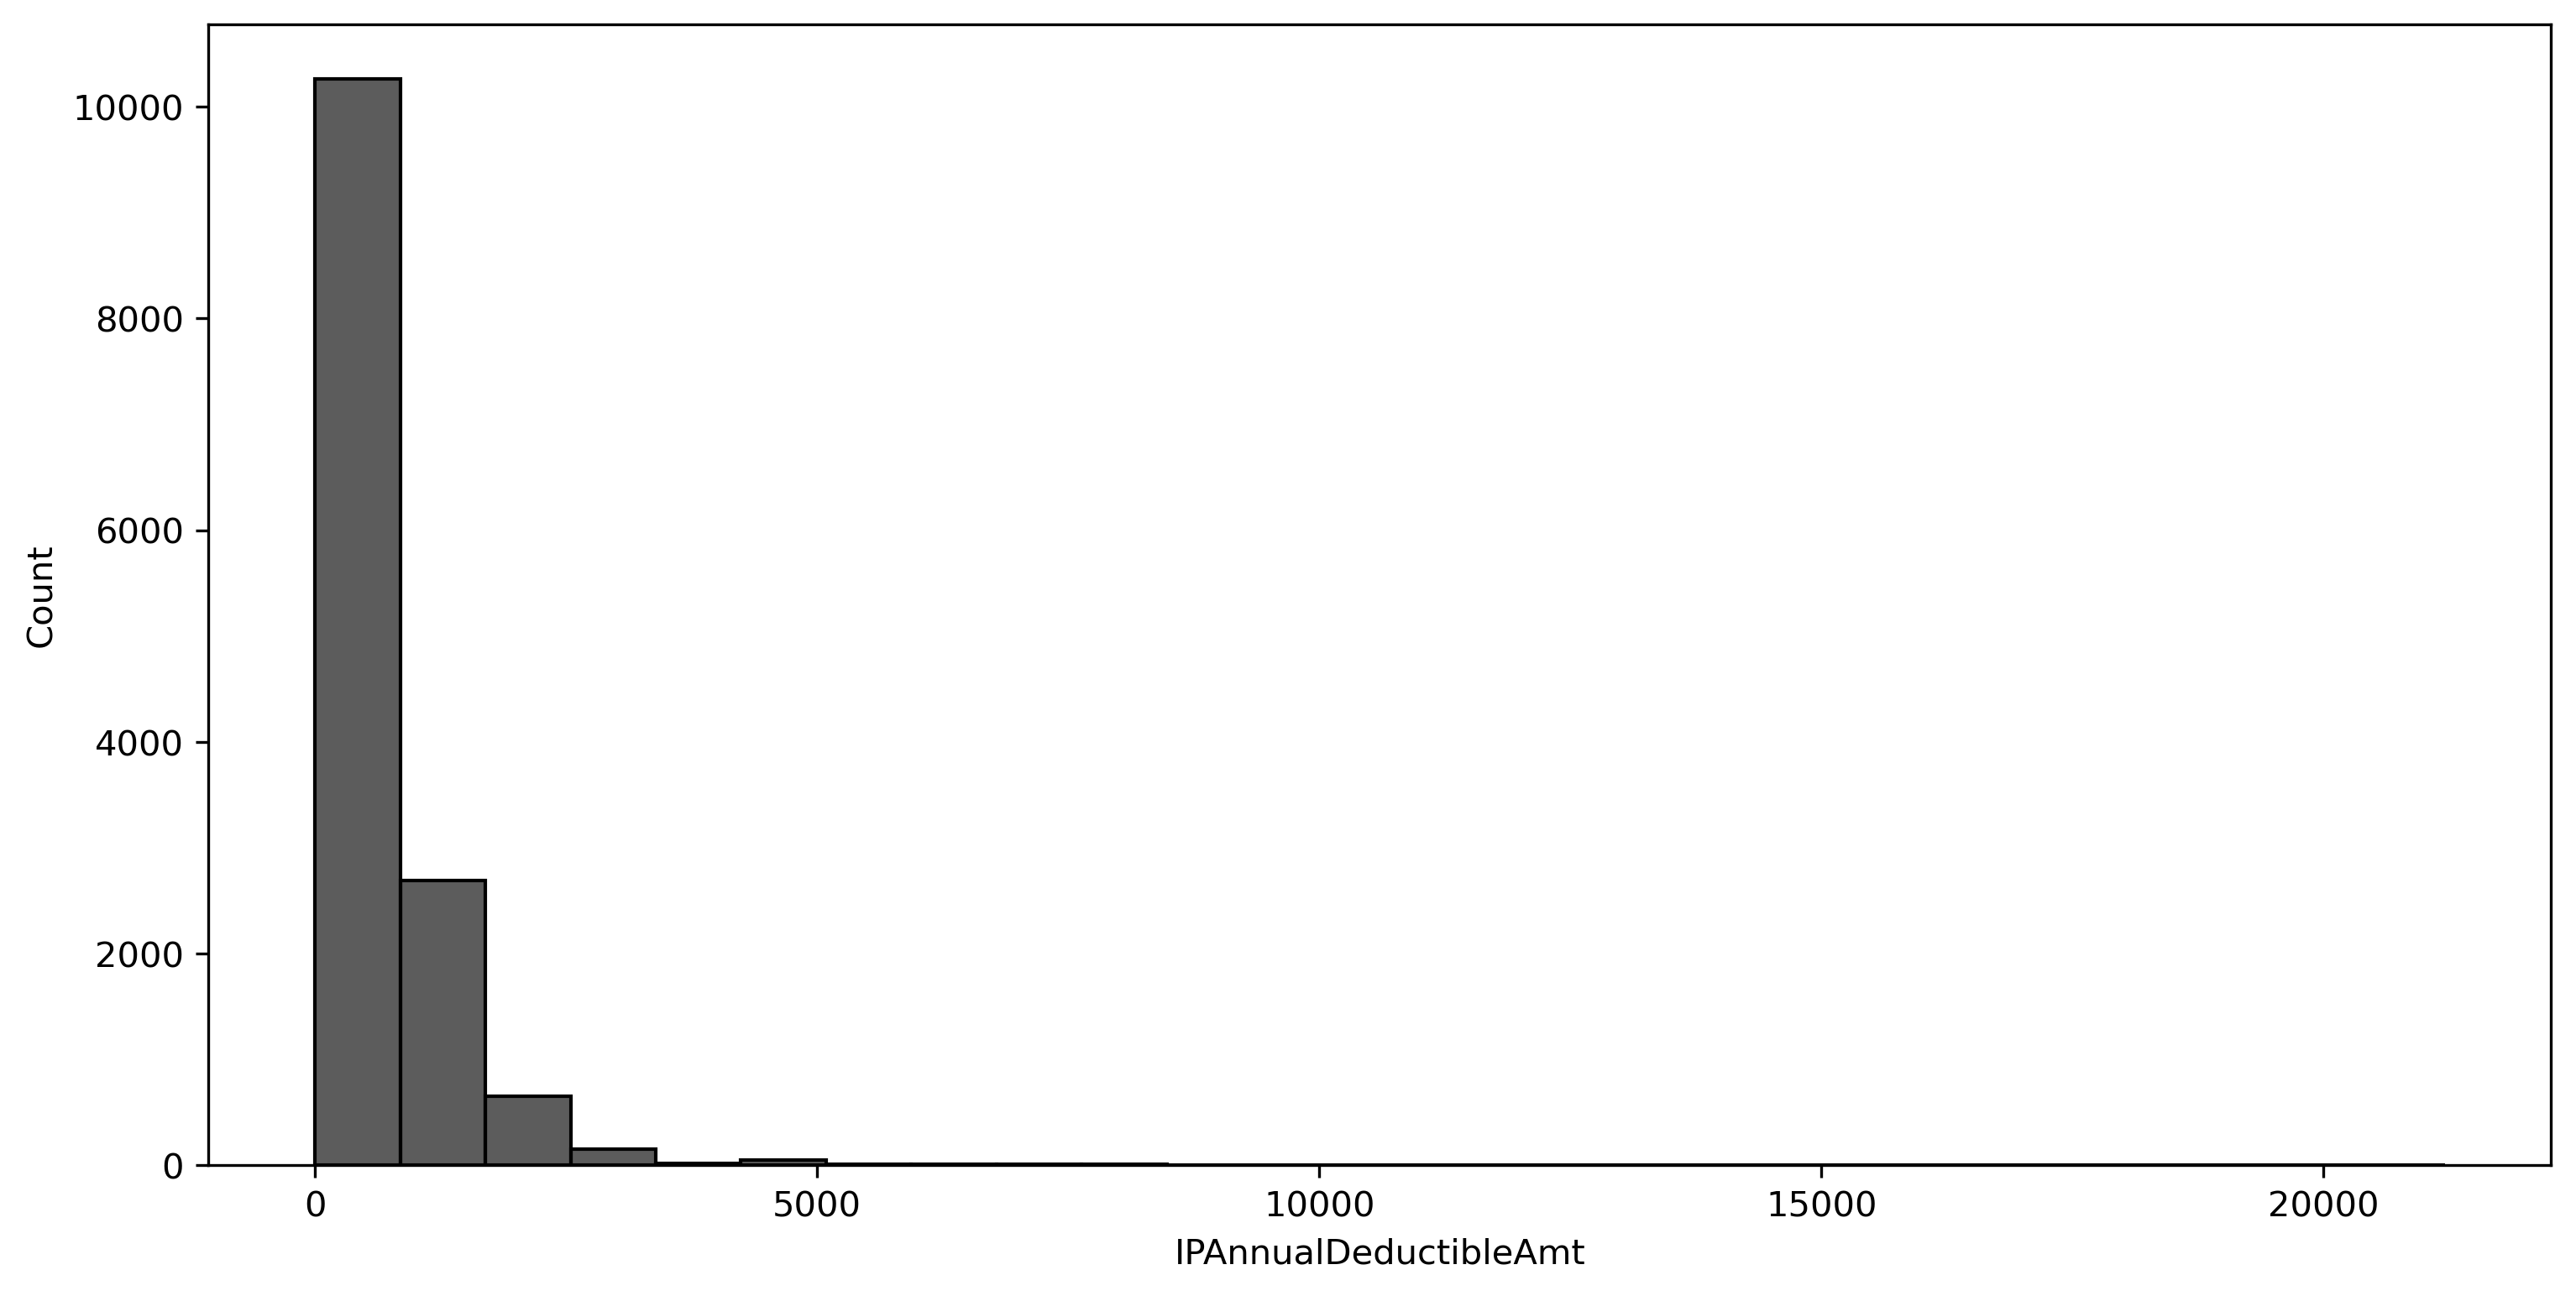

In [31]:
ben_assumption_test.hist_plot(feature='IPAnnualDeductibleAmt',
                              color='#262626',
                              fig_size=[12, 6],
                              save=True,
                              bins=25,
                              path='../../demo/Fraud Detection/IPAnnualDeductibleAmt_histogram.png')

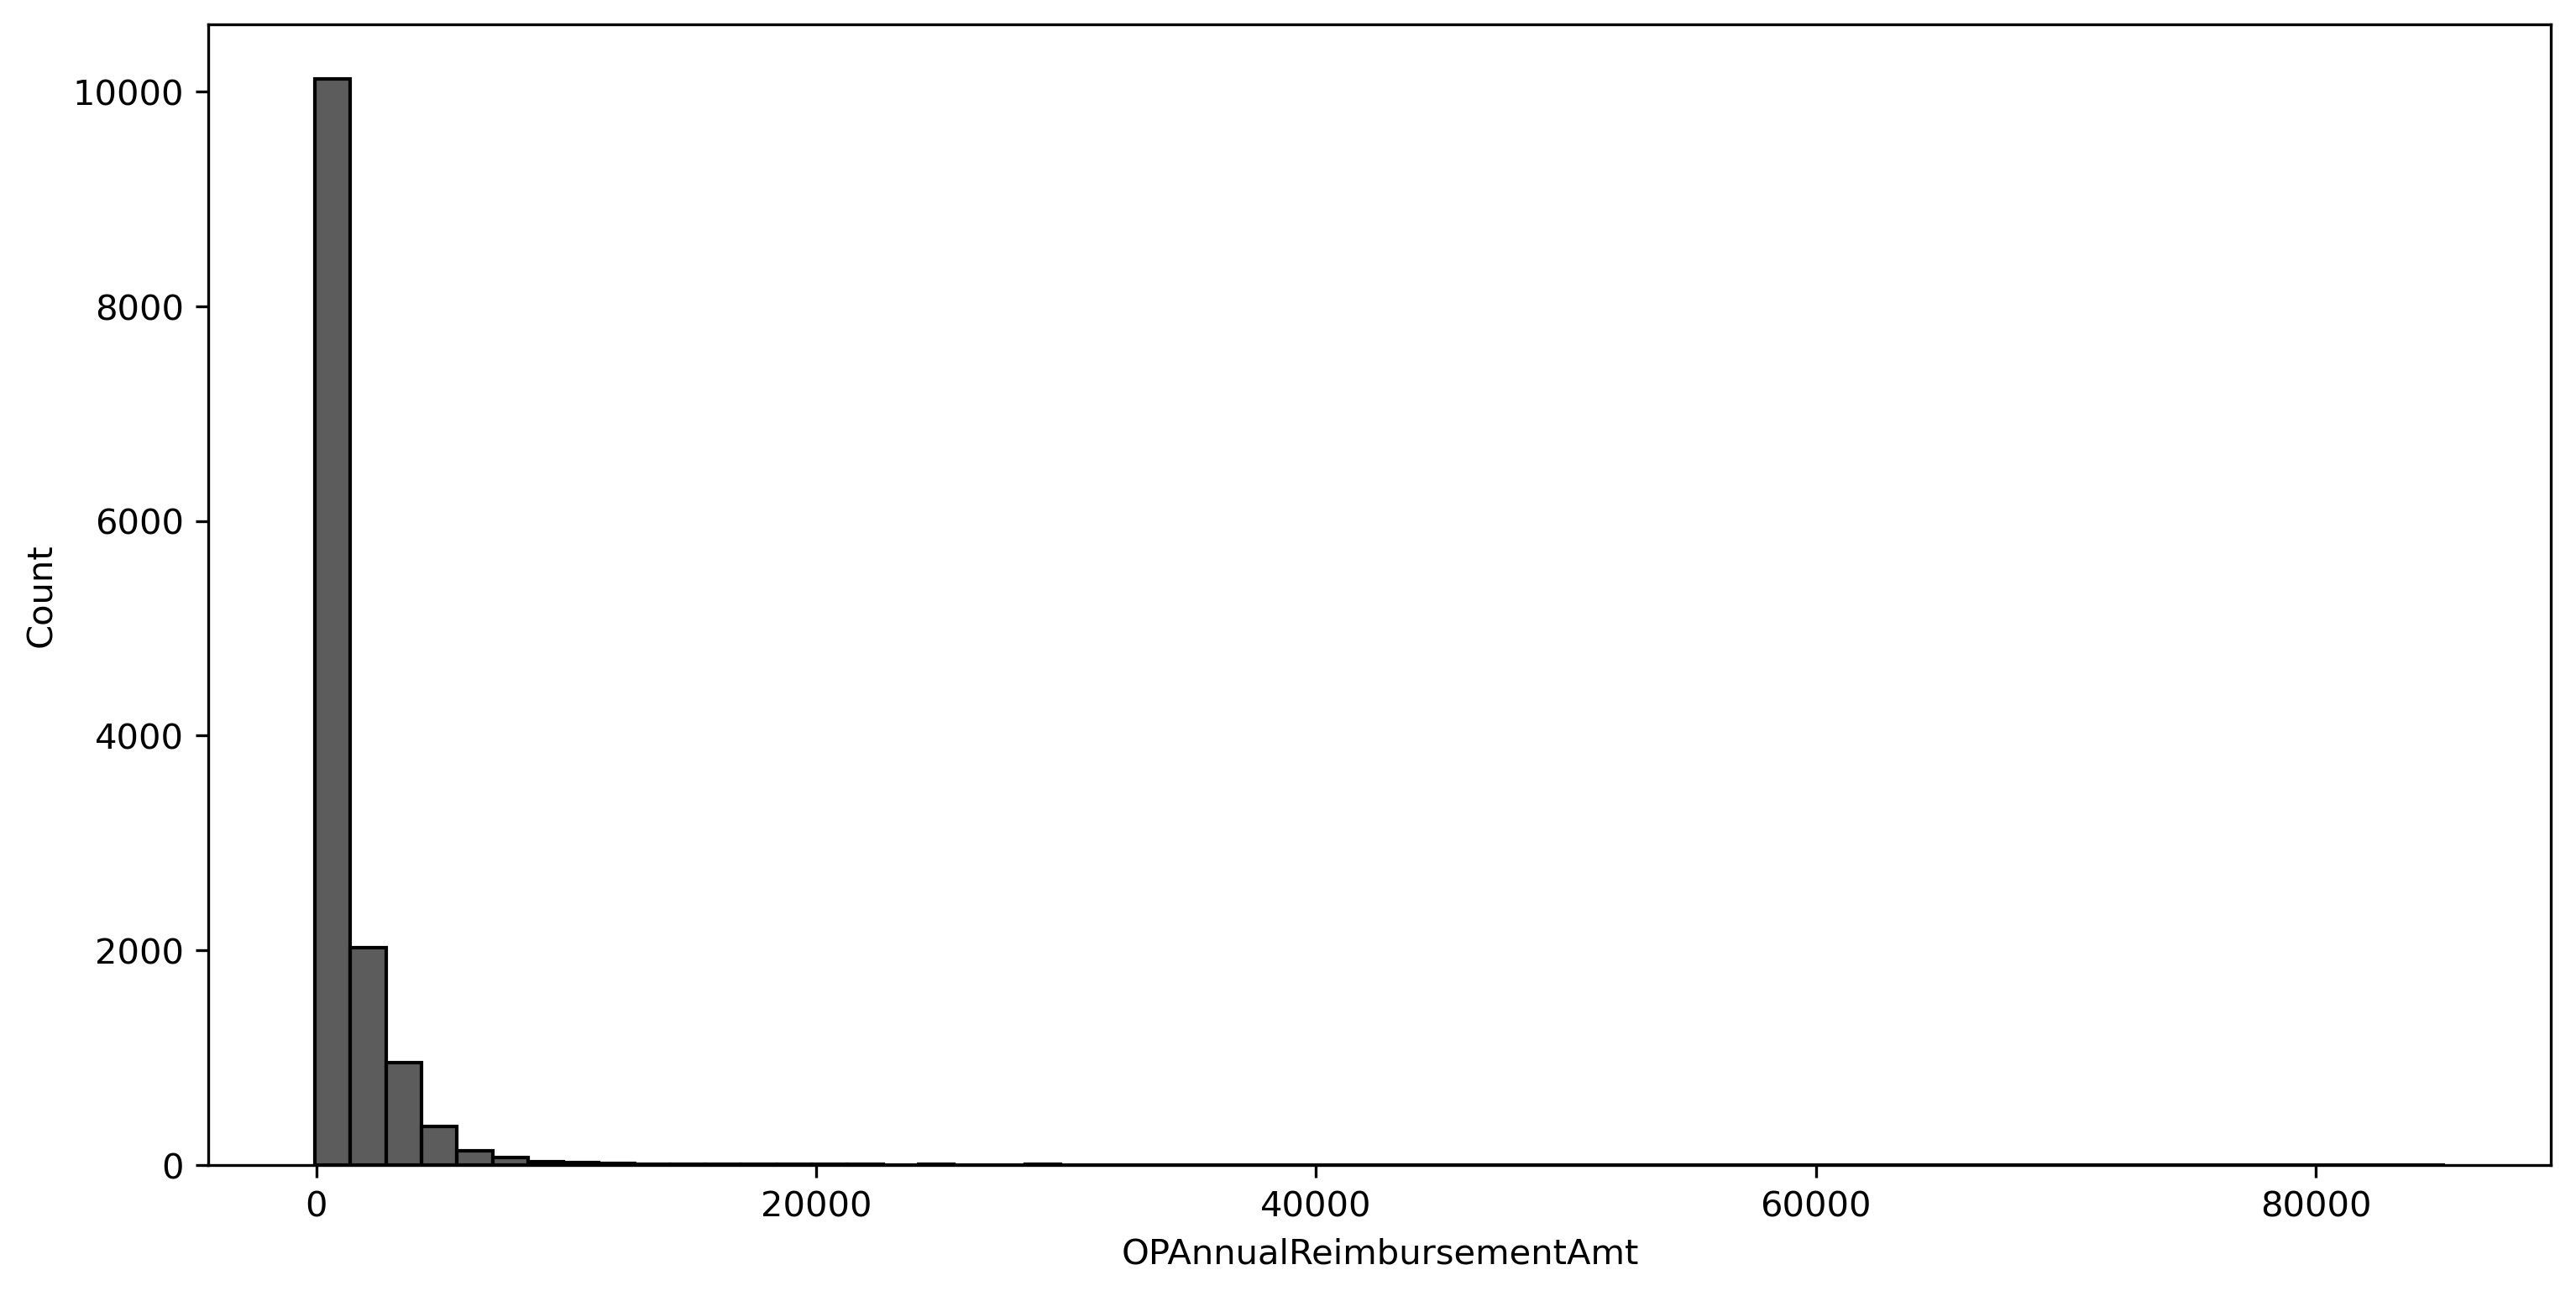

In [37]:
ben_assumption_test.hist_plot(feature='OPAnnualReimbursementAmt',
                              color='#262626',
                              fig_size=[12, 6],
                              save=True,
                              bins=60,
                              path='../../demo/Fraud Detection/OPAnnualReimbursementAmt_histogram.png')

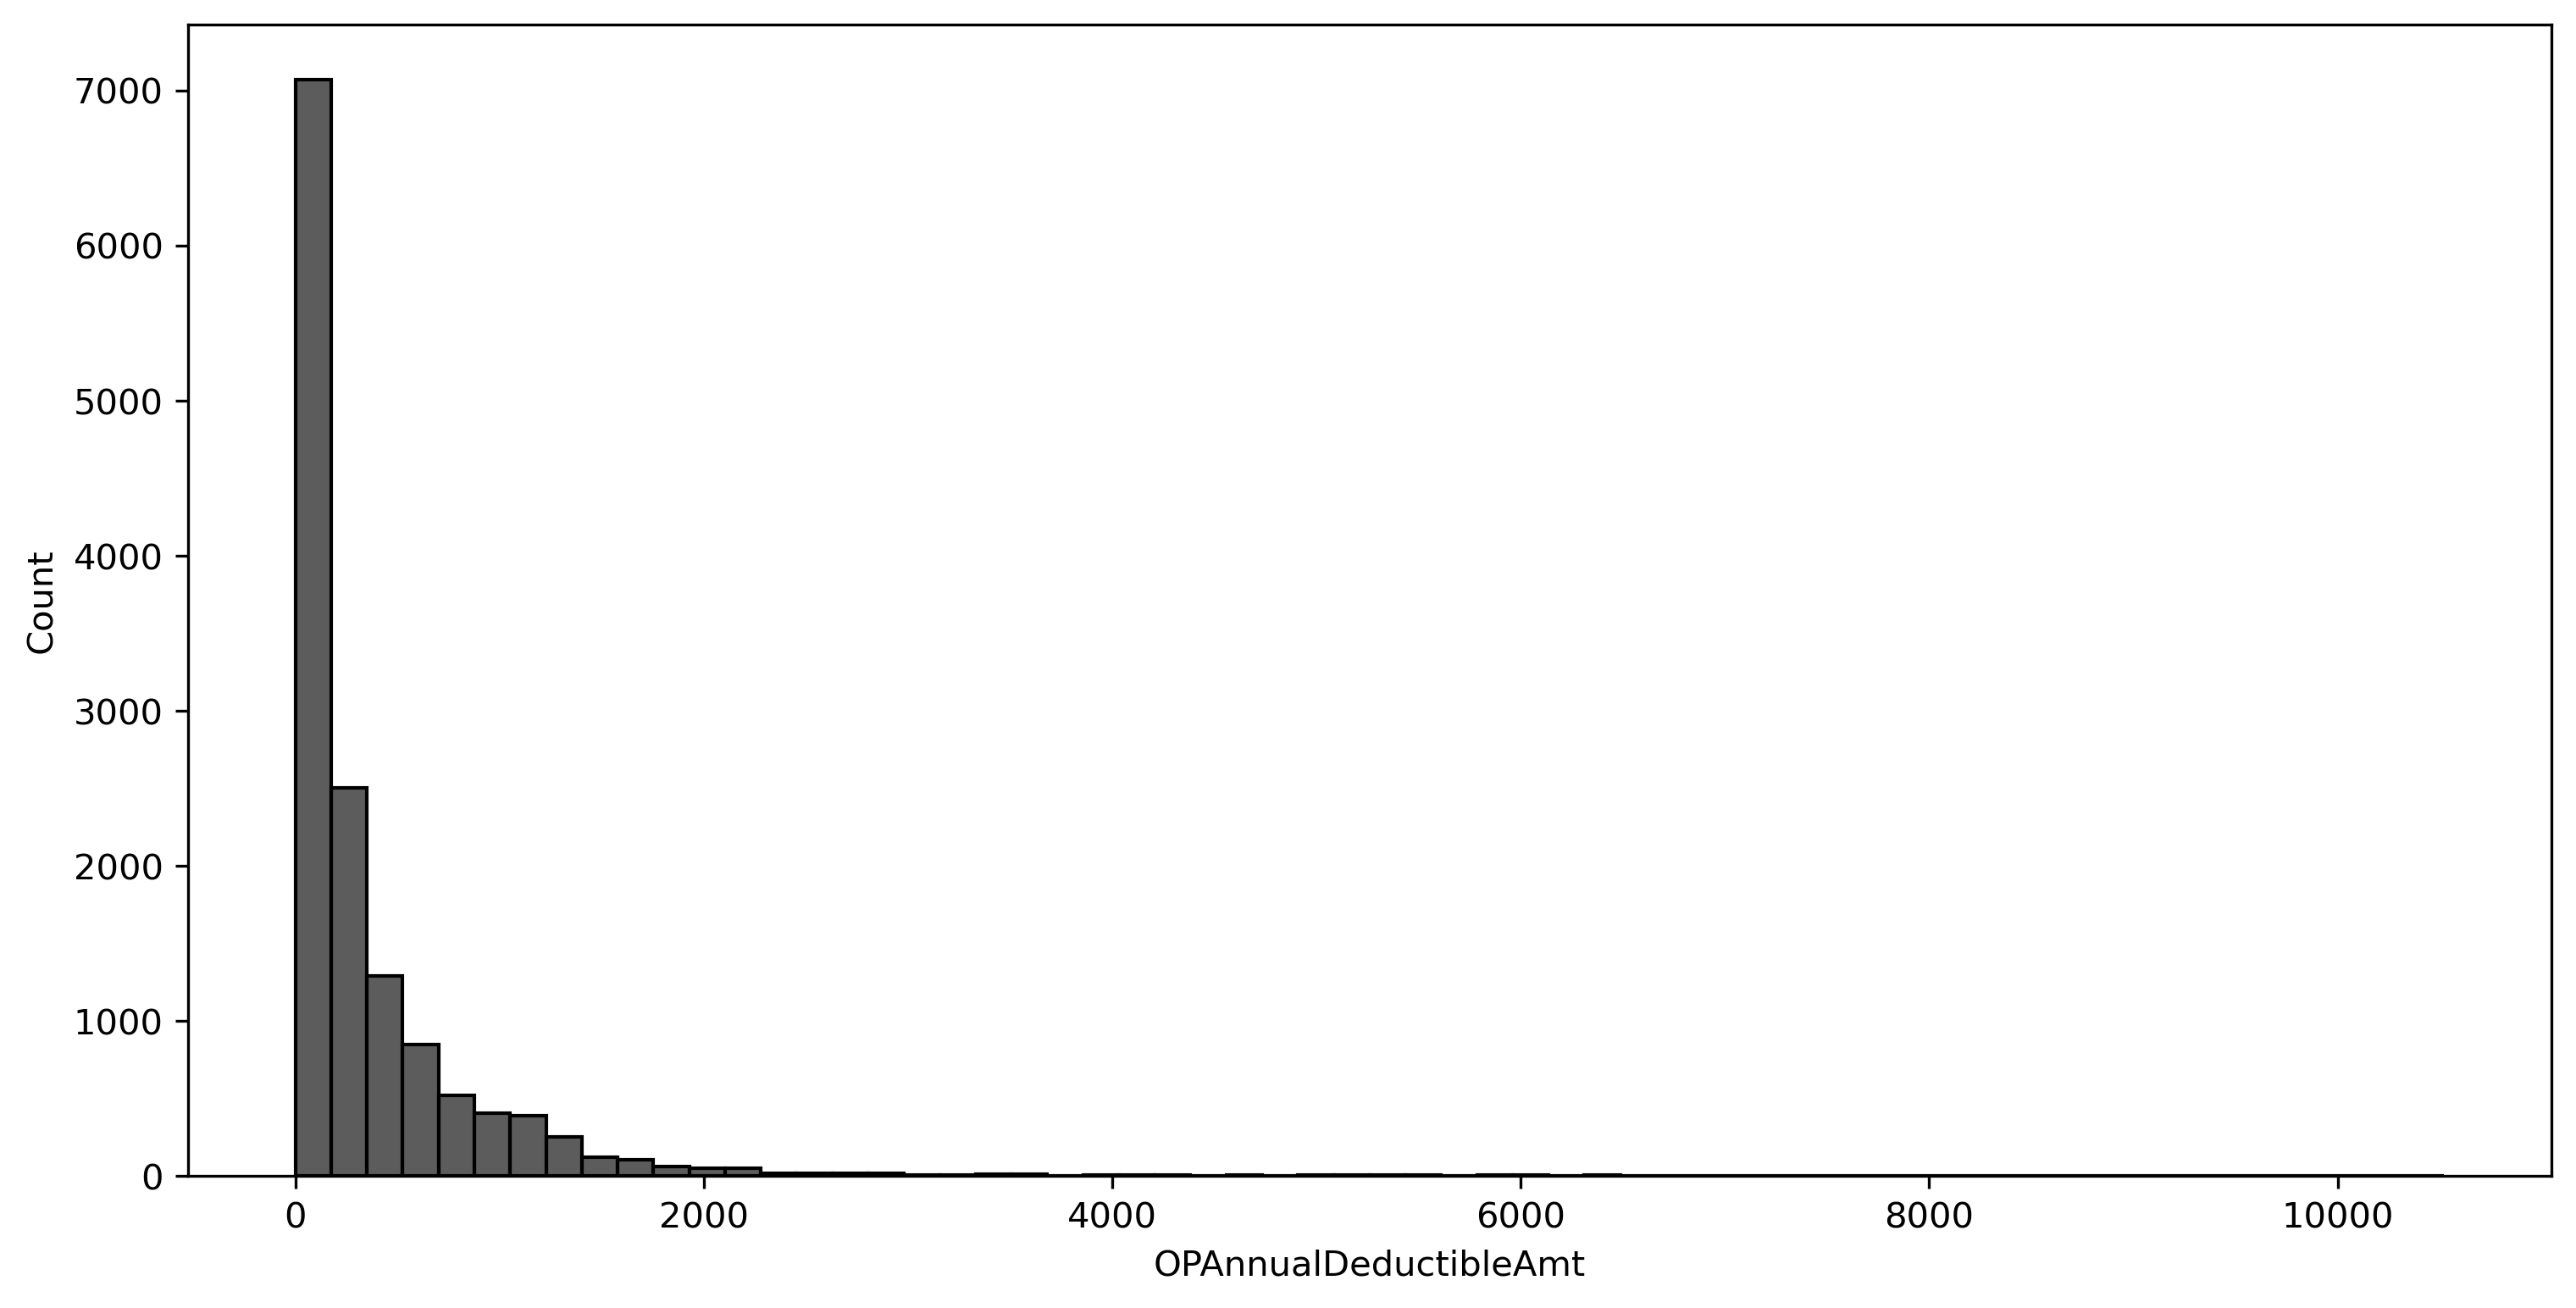

In [36]:
ben_assumption_test.hist_plot(feature='OPAnnualDeductibleAmt',
                              color='#262626',
                              fig_size=[12, 6],
                              save=True,
                              bins=60,
                              path='../../demo/Fraud Detection/OPAnnualDeductibleAmt_histogram.png')
